<a href="https://colab.research.google.com/github/JaiswalFelipe/deep-segmentation/blob/master/patch_maker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install rasterio
!pip install patchify
!pip install imagecodecs
!pip install tifffile 
!pip install GDAL

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
import os 
import cv2
import rasterio
import numpy as np
import tifffile as tiff
import imageio

from skimage import transform
from skimage import img_as_float
from matplotlib import pyplot as plt
from patchify import patchify, unpatchify
from PIL import Image
from rasterio.plot import show
from osgeo import gdal 

# Visuals

## Image

In [19]:
# opening the data
data = gdal.Open("/content/drive/MyDrive/Dissertation/ng_data/tile_1987_stack.tif")

# number of bands
print(data.RasterCount)

mask = imageio.imread("/content/drive/MyDrive/Dissertation/ng_data/masks/tile_1987_mask.tif")

23


In [20]:
# fetch bands
#band1 = data.GetRasterBand(1).ReadAsArray()
#band2 = data.GetRasterBand(2).ReadAsArray()
band3 = data.GetRasterBand(3).ReadAsArray()
band4 = data.GetRasterBand(4).ReadAsArray()
band5 = data.GetRasterBand(5).ReadAsArray()
#band6 = data.GetRasterBand(6).ReadAsArray()
#band7 = data.GetRasterBand(7).ReadAsArray()
#band8 = data.GetRasterBand(8).ReadAsArray()
#band9 = data.GetRasterBand(9).ReadAsArray()
#band10 = data.GetRasterBand(10).ReadAsArray()
#band11 = data.GetRasterBand(11).ReadAsArray()
#band12 = data.GetRasterBand(12).ReadAsArray()
#band13 = data.GetRasterBand(13).ReadAsArray()
#band14 = data.GetRasterBand(14).ReadAsArray()
#band15 = data.GetRasterBand(15).ReadAsArray()
#band16 = data.GetRasterBand(16).ReadAsArray()
#band17 = data.GetRasterBand(17).ReadAsArray()
#band18 = data.GetRasterBand(18).ReadAsArray()
#band19 = data.GetRasterBand(19).ReadAsArray()
#band20 = data.GetRasterBand(20).ReadAsArray()
#band21 = data.GetRasterBand(21).ReadAsArray()
#band22 = data.GetRasterBand(22).ReadAsArray()
#band23 = data.GetRasterBand(23).ReadAsArray()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Mask')

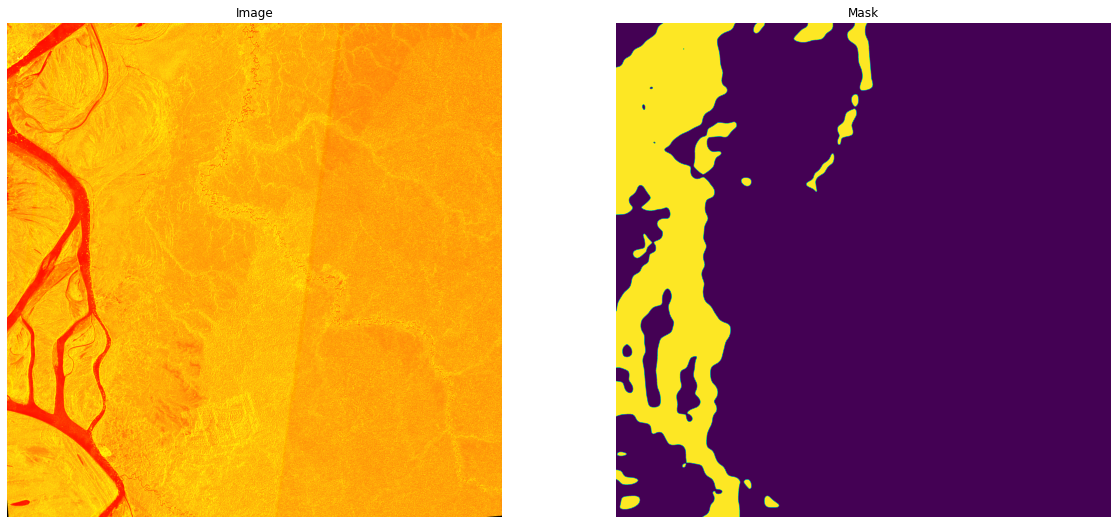

In [22]:
# it can only show 4 channels, you can check combination of 4 channels

img = np.dstack((band5,band4,band3))


#plotting
f = plt.figure(figsize = (20,20))
rows = 2
columns = 2

# Image
f.add_subplot(rows, columns, 1)
plt.imshow(img)
plt.axis('off')
plt.title('Image')

# Mask
f.add_subplot(rows, columns, 2)
plt.imshow(mask)
plt.axis('off')
plt.title('Mask')

#plt.show()

# single band
#f = plt.figure(figsize = (20,20))
#plt.imshow(band1)

# Image Patching

In [ ]:
def image_patcher(image_file, output_folder, patch_shape, step):
	
  image = img_as_float(imageio.imread(image_file))
  #plt.imshow(image[:,:,1])
  #image.shape

  #size_x = ((image.shape[1]//patch_size)*patch_size).astype(np.uint8)
  #size_y = ((image.shape[0]//patch_size)*patch_size).astype(np.uint8)
  
  #image = Image.fromarray(image)
  #image = image.crop((0,0, size_x, size_y))
  #image = np.array(image)

  patches = patchify(image, patch_shape, step = step)
  print(patches.shape)
	
  for i in range(patches.shape[0]):
    for j in range(patches.shape[1]):
		
      single_patch_img = patches[i,j,:,:]
      tiff.imwrite(output_folder + "patch" + str(i) + str(j) + ".tif", single_patch_img) 

In [ ]:
# Test run
image_patcher("/content/drive/MyDrive/Dissertation/ng_data/tile_1986_stack.tif","/content/drive/MyDrive/Dissertation/ng_data/training/image/tile_1986/", (250,250,23), 250) 

In [17]:
patch_size = 250 * 250
print(patch_size)

original_img = 4000 * 4000
print(original_img)

patches = original_img / patch_size
print(patches)

check = 16 * 16
print(check)

62500
16000000
256.0
256


# Mask patching

In [ ]:
mask = imageio.imread("/content/drive/MyDrive/Dissertation/ng_data/masks/tile_1599_image_mask.tif").astype(int)
labels, count = np.unique(mask[:,0], return_counts = True)

print(labels, count)

[0 1] [ 413 3587]


In [9]:
def mask_patcher(mask_file, output_folder, patch_shape, step):
	
  mask = imageio.imread(mask_file).astype(int)
  #plt.imshow(image[:,:,1])
  #image.shape

  #size_x = ((image.shape[1]//patch_size)*patch_size).astype(np.uint8)
  #size_y = ((image.shape[0]//patch_size)*patch_size).astype(np.uint8)
  
  #image = Image.fromarray(image)
  #image = image.crop((0,0, size_x, size_y))
  #image = np.array(image)

  patches = patchify(mask, patch_shape, step = step)
  print(patches.shape)
	
  for i in range(patches.shape[0]):
    for j in range(patches.shape[1]):
		
      single_patch_mask = patches[i,j,:,:]
      tiff.imwrite(output_folder + "patch" + str(i) + str(j) + ".tif", single_patch_mask) 
      single_patch_mask = single_patch_mask / 255.

In [12]:
# test run
mask_patcher("/content/drive/MyDrive/Dissertation/ng_data/masks/tile_1986_mask.tif","/content/drive/MyDrive/Dissertation/ng_data/training/mask/1986_mask/", (250,250), 250)

(16, 16, 250, 250)
